In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../datasets/diabetes_prediction_dataset.csv')
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe())

Dataset Shape: (100000, 9)

Column Names:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data colu

In [6]:
target_col = 'diabetes' if 'diabetes' in df.columns else df.columns[-1]
print(f"\nTarget Variable: {target_col}")
print("\nClass Distribution:")
print(df[target_col].value_counts())
print(f"\nClass Percentage:")
print(df[target_col].value_counts(normalize=True) * 100)


Target Variable: diabetes

Class Distribution:
diabetes
0    87664
1     8482
Name: count, dtype: int64

Class Percentage:
diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64


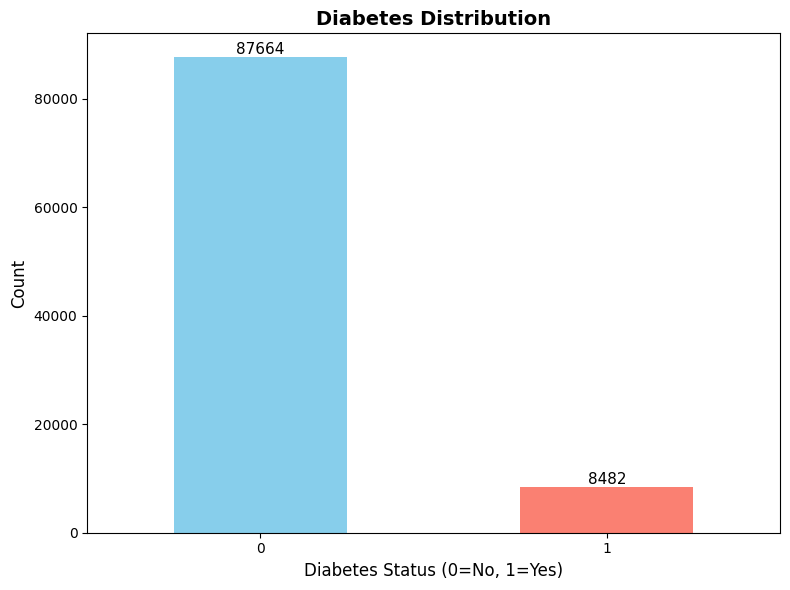


Diabetes Cases: 8482 (8.8%)
Non-Diabetes Cases: 87664 (91.2%)


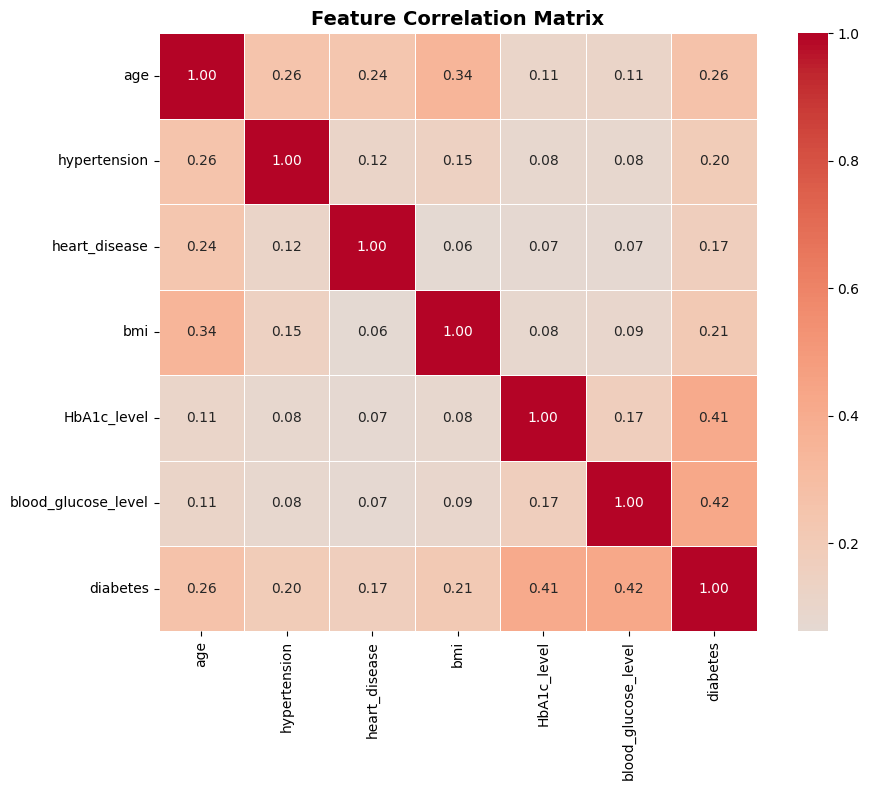


Correlation with Diabetes (Target):
blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264927
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
Name: diabetes, dtype: float64

Top 4 features correlated with diabetes: ['blood_glucose_level', 'HbA1c_level', 'age', 'bmi']


C:\Users\Urooj Ilyas\AppData\Local\Temp\ipykernel_6040\578236480.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot(data_to_plot, labels=['No Diabetes', 'Diabetes'])
C:\Users\Urooj Ilyas\AppData\Local\Temp\ipykernel_6040\578236480.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot(data_to_plot, labels=['No Diabetes', 'Diabetes'])
C:\Users\Urooj Ilyas\AppData\Local\Temp\ipykernel_6040\578236480.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot(data_to_plot, labels=['No Diabetes', 'Diabetes'])
C:\Users\Urooj Ilyas\AppData\Local\Temp\ipykernel_6040\578236480.py

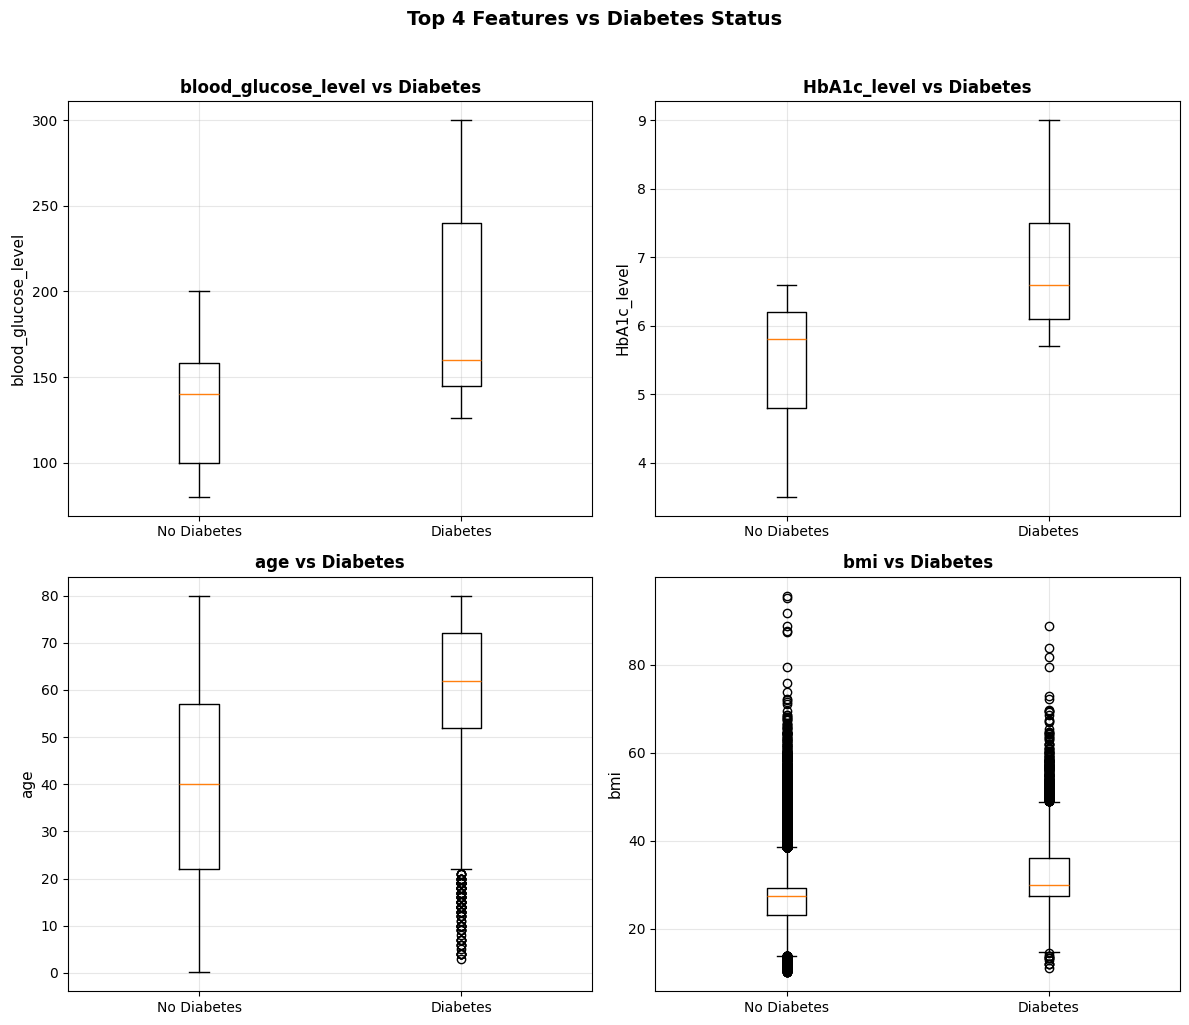

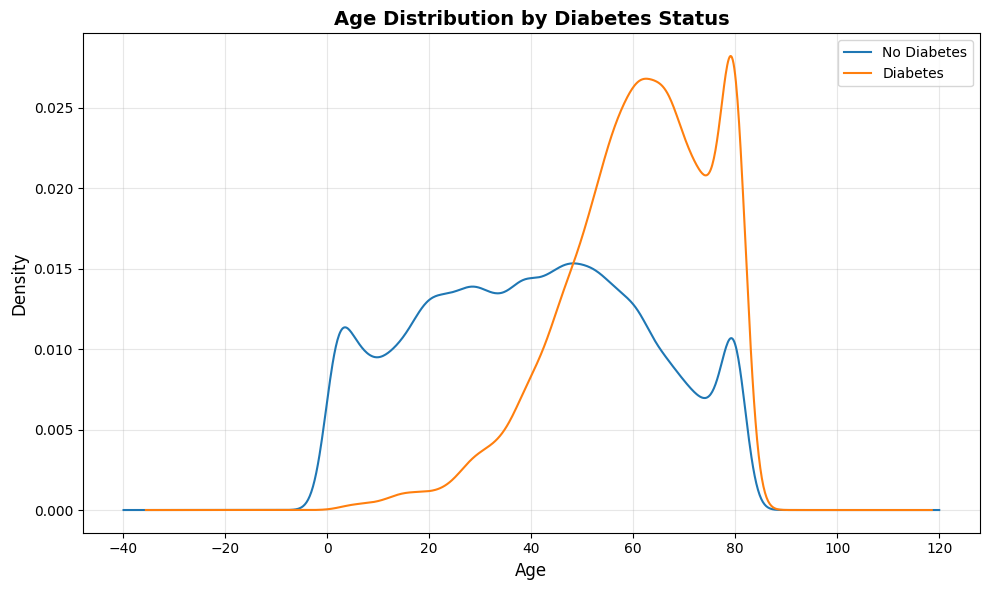

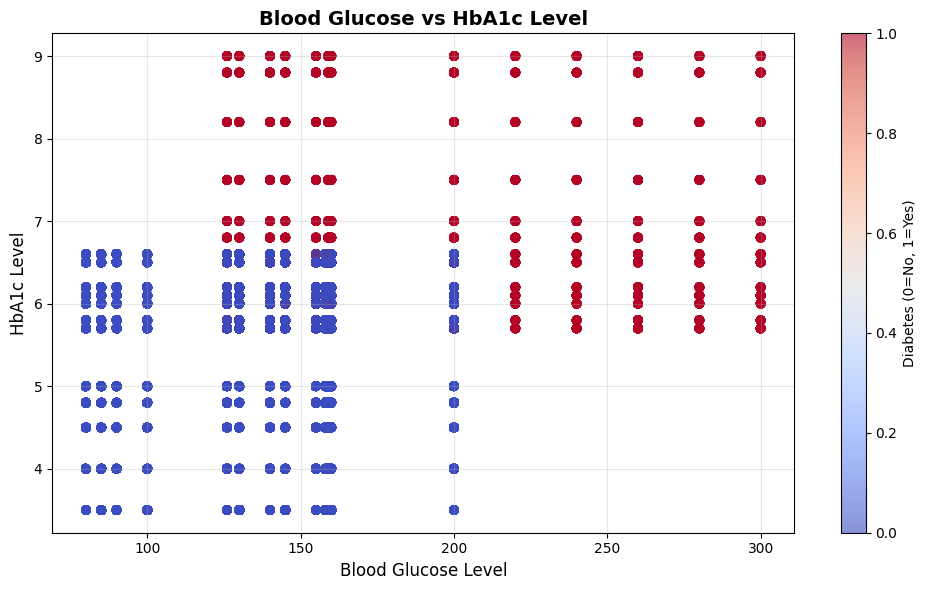

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
# 1. Target Distribution - Most Important
plt.figure(figsize=(8, 6))
ax = df[target_col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Diabetes Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add count labels on bars
for i, v in enumerate(df[target_col].value_counts()):
    ax.text(i, v + 500, str(v), ha='center', fontsize=11)
plt.tight_layout()
plt.show()

print(f"\nDiabetes Cases: {df[target_col].sum()} ({df[target_col].mean()*100:.1f}%)")
print(f"Non-Diabetes Cases: {len(df) - df[target_col].sum()} ({100 - df[target_col].mean()*100:.1f}%)")

# 2. Correlation Matrix - Important for feature selection
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Check correlation with diabetes specifically
print("\nCorrelation with Diabetes (Target):")
corr_with_target = df[numeric_cols].corr()[target_col].drop(target_col).sort_values(ascending=False)
print(corr_with_target)

# 3. Top 4 Most Important Features vs Diabetes (based on correlation)
top_features = corr_with_target.head(4).index.tolist()
print(f"\nTop 4 features correlated with diabetes: {top_features}")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(top_features):
    # Boxplot for each feature by diabetes status
    data_to_plot = [df[df[target_col] == 0][col].dropna(), 
                    df[df[target_col] == 1][col].dropna()]
    
    axes[idx].boxplot(data_to_plot, labels=['No Diabetes', 'Diabetes'])
    axes[idx].set_title(f'{col} vs Diabetes', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Top 4 Features vs Diabetes Status', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 4. Age Distribution by Diabetes Status - Very important for medical data
plt.figure(figsize=(10, 6))
df.groupby(target_col)['age'].plot(kind='kde', legend=True)
plt.title('Age Distribution by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['No Diabetes', 'Diabetes'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Blood Glucose vs HbA1c scatter plot (two most important clinical markers)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['blood_glucose_level'], df['HbA1c_level'], 
                      c=df[target_col], alpha=0.6, cmap='coolwarm')
plt.colorbar(scatter, label='Diabetes (0=No, 1=Yes)')
plt.title('Blood Glucose vs HbA1c Level', fontsize=14, fontweight='bold')
plt.xlabel('Blood Glucose Level', fontsize=12)
plt.ylabel('HbA1c Level', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("\nData Quality Report:")
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"Total Missing Values: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['float64', 'int64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

df = df.drop_duplicates()
df.to_csv('../datasets/diabetes_prediction_dataset.csv', index=False)
print(f"Final Shape: {df.shape}")


Data Quality Report:
Duplicate Rows: 0
Total Missing Values: 0
Final Shape: (96146, 9)
